In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv('../results/MNIST_1_shift.csv', index_col=0)
#data['run_dir'] = data['run_dir'].str.split('/').apply(lambda a: '/'.join(a[2:]))
data['model'] = data['run_dir'].str.split('/').apply(lambda a: a[3])
data = data[data['model'].isin(['Performer_MNIST_linear', 'RelativePerformer_MNIST_linear'])]


In [30]:
data2 = pd.read_csv('../results/MNIST_1_shift_alternative.csv', index_col=0)
data2['model'] = data2['run_dir'].str.split('/').apply(lambda a: '/'.join(a[2:]))
data2 = data2[data2['model'].str.startswith('ClippedRelativePerformer')]


In [38]:
data = pd.concat([data, data2])

In [40]:
data

,run_dir,shift,accuracy_mean,accuracy_std,loss_mean,loss_std,model
0,lightning_logs/fixed/resize_fixed_relative_red...,-8,0.257611,0.437575,3.222612,3.027003,Performer_MNIST_linear
1,lightning_logs/fixed/resize_fixed_relative_red...,-7,0.423888,0.494463,2.346627,2.839095,Performer_MNIST_linear
2,lightning_logs/fixed/resize_fixed_relative_red...,-6,0.569087,0.495494,1.610293,2.419082,Performer_MNIST_linear
3,lightning_logs/fixed/resize_fixed_relative_red...,-5,0.730679,0.443867,0.893380,1.879125,Performer_MNIST_linear
4,lightning_logs/fixed/resize_fixed_relative_red...,-4,0.907494,0.289908,0.344259,1.344127,Performer_MNIST_linear
...,...,...,...,...,...,...,...
63,lightning_logs/clipped_relative/ClippedRelativ...,4,0.995316,0.068318,0.016149,0.219173,ClippedRelativePerformer_MNIST_linear_dist6
64,lightning_logs/clipped_relative/ClippedRelativ...,5,0.994145,0.076337,0.019019,0.242843,ClippedRelativePerformer_MNIST_linear_dist6
65,lightning_logs/clipped_relative/ClippedRelativ...,6,0.992974,0.083574,0.027633,0.287813,ClippedRelativePerformer_MNIST_linear_dist6
66,lightning_logs/clipped_relative/ClippedRelativ...,7,0.980094,0.139760,0.052229,0.392466,ClippedRelativePerformer_MNIST_linear_dist6


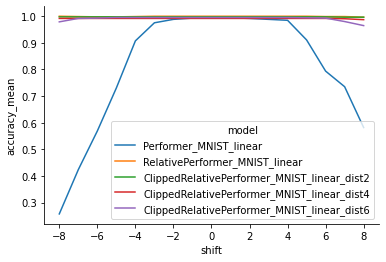

In [41]:
sns.lineplot(data=data, x='shift', y='accuracy_mean', hue='model')
sns.despine()

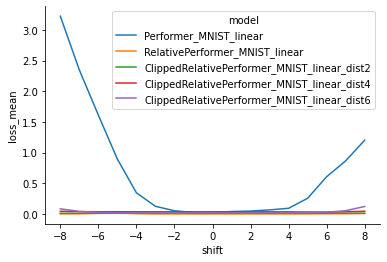

In [46]:
data['log_loss'] = np.log10(data['loss_mean'])
sns.lineplot(data=data, x='shift', y='loss_mean', hue='model')
sns.despine()